In [29]:
import cv2 as cv
from PIL import Image
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import os


BASE_DATA_DIR = "../data"
CATS = "/cat images"
VIDEOS = "/videos"

os.listdir(BASE_DATA_DIR + CATS)

['cat-5.png', 'cat-1.png', 'cat-0.png', 'cat-2.png', 'cat-4.png', 'cat-3.png']

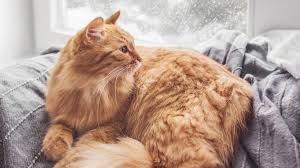

In [38]:
img = cv.imread(BASE_DATA_DIR + CATS + "/cat-4.png")
to_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
display(Image.fromarray(to_rgb))

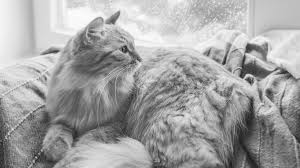

In [4]:
# contour can be viewed as edges

to_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
display(Image.fromarray(to_gray))

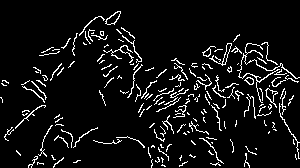

In [39]:
# grab the edges of the image
blurred = cv.GaussianBlur(to_gray, ksize=(3, 3), sigmaX=cv.BORDER_DEFAULT)
canny = cv.Canny(blurred, threshold1=125, threshold2=175)
canny_to_rgb = cv.cvtColor(canny, cv.COLOR_GRAY2RGB)
display(Image.fromarray(canny_to_rgb))

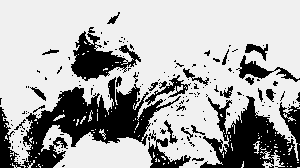

In [24]:
# threshold
# looks at the image and tries to binarize the image
# here, if the density of that pixel is below 125 it will be set to 0 (black),
# if it's above 125, it will be set to 255 (white)
ret, thresh = cv.threshold(to_gray, thresh=130, maxval=240, type=cv.THRESH_BINARY)
to_rgb = cv.cvtColor(thresh, cv.COLOR_BGR2RGB)
display(Image.fromarray(to_rgb))

In [13]:
# contours is a list of all contours found in the image
# hierarchies represents the hierarchical representation of contours
# mode:
# cv.RETR_LIST returns all contours
# cv.RETR_EXTERNAL retrieves only the external contours
# cv.RETR_TREE retrieves only the hierarchical contours
# method:
# cv.CHAIN_APPROX_NONE does nothing, just returns all contours
# cv.CHAIN_APPROX_SIMPLE compresses all contours returned into 2 endpoints (a line)

contours, hierarchies = cv.findContours(image=thresh, mode=cv.RETR_LIST, method=cv.CHAIN_APPROX_SIMPLE)
print(len(contours))

406


In [55]:
blank = np.zeros(img.shape, dtype=np.uint8)

cv.drawContours(blank, contours=contours, contourIdx=-1, color=(255, 255, 255), thickness=1)
blank_to_rgb = cv.cvtColor(blank, cv.COLOR_BGR2RGB)

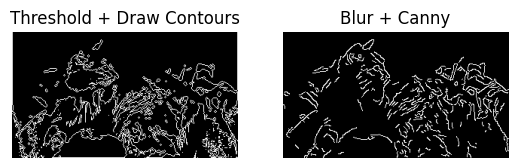

In [56]:
# threshold vs canny
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Threshold + Draw Contours")
plt.axis(False)
plt.imshow(blank_to_rgb)

plt.subplot(1, 2, 2)
plt.title("Blur + Canny")
plt.axis(False)
plt.imshow(canny_to_rgb)